In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle

In [33]:
df = pd.read_csv("solarpowergeneration.csv")

In [34]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [35]:
df.shape

(2920, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [37]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [38]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

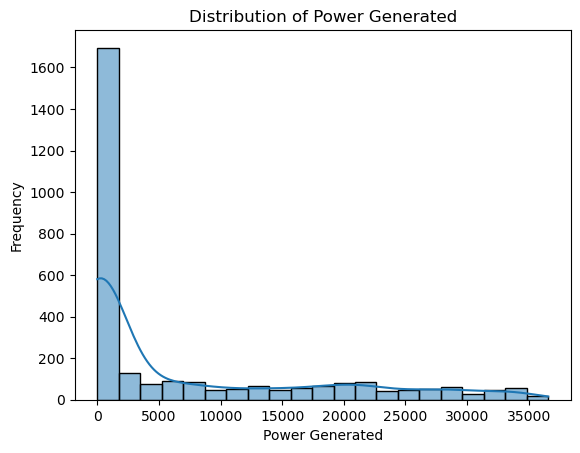

In [39]:
##Target Variable Distribution
sns.histplot(df["power-generated"], kde=True)
plt.title("Distribution of Power Generated")
plt.xlabel("Power Generated")
plt.ylabel("Frequency")
plt.show()

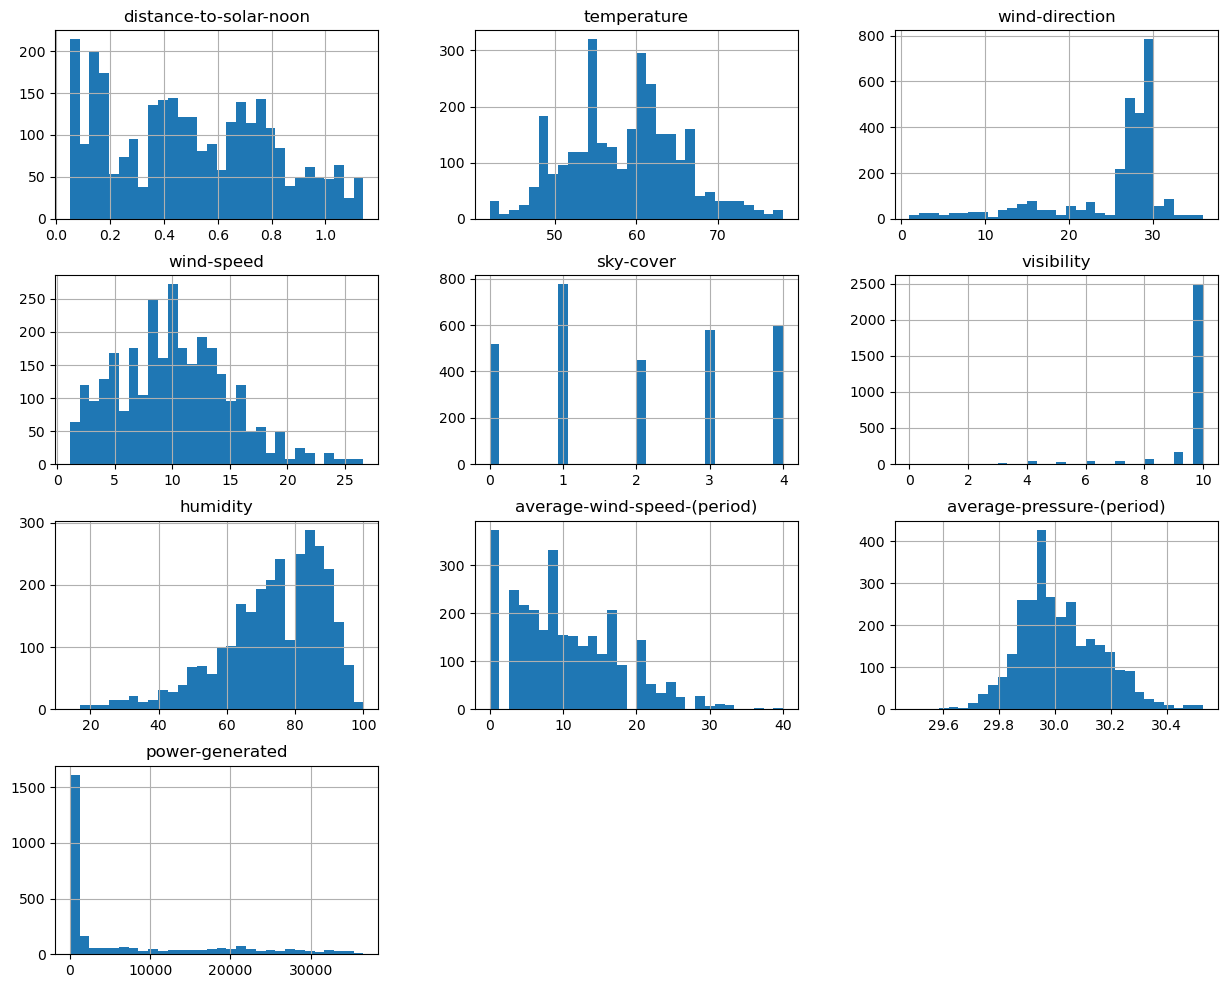

In [40]:
##Histogram for Numerical features
df.hist(bins=30, figsize=(15,12))
plt.title("Distribution of Numerical Features", fontsize=16)
plt.show()

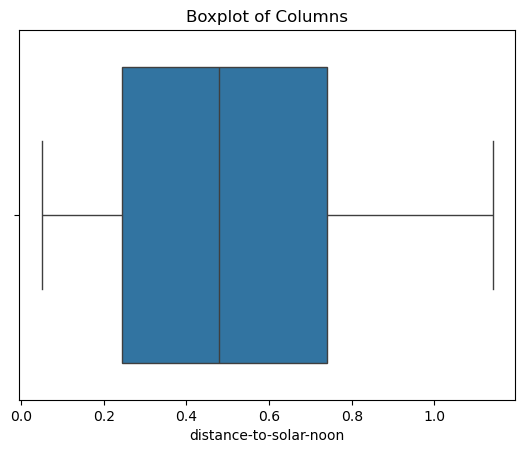

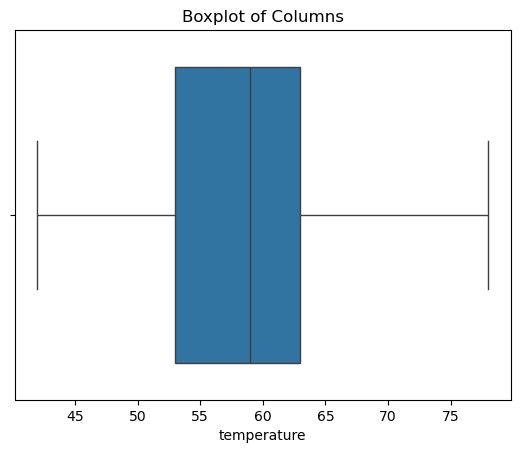

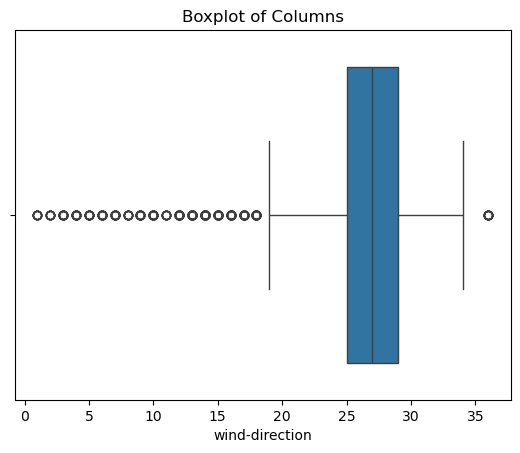

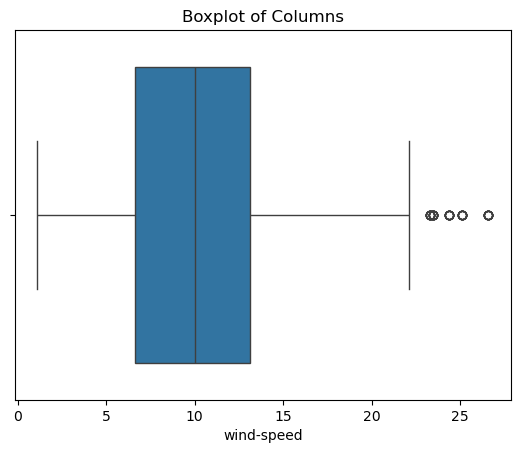

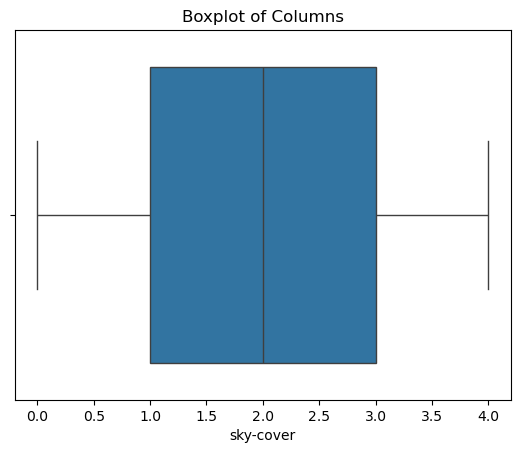

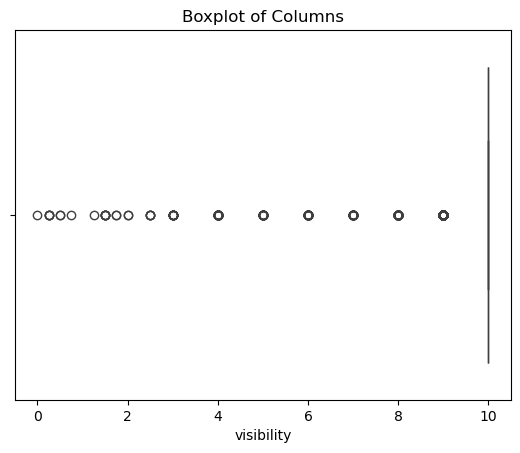

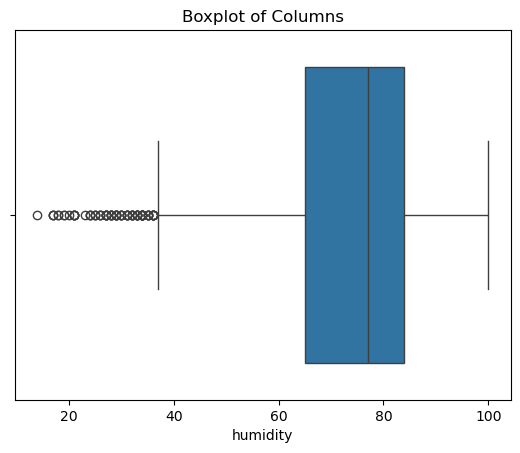

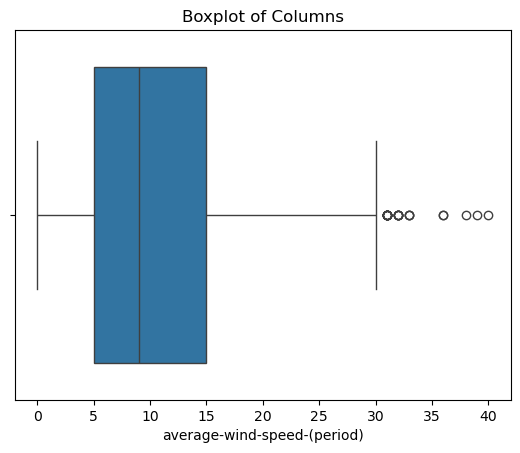

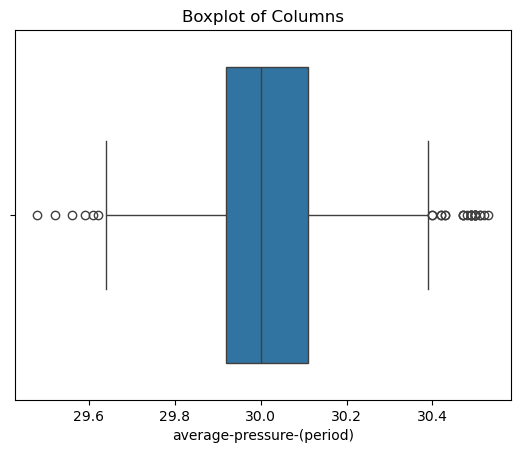

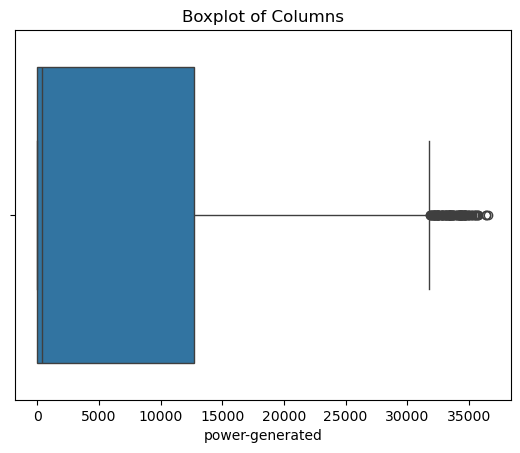

In [41]:
##Boxplot Analysis
for column in df.columns:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title("Boxplot of Columns")
  plt.show()

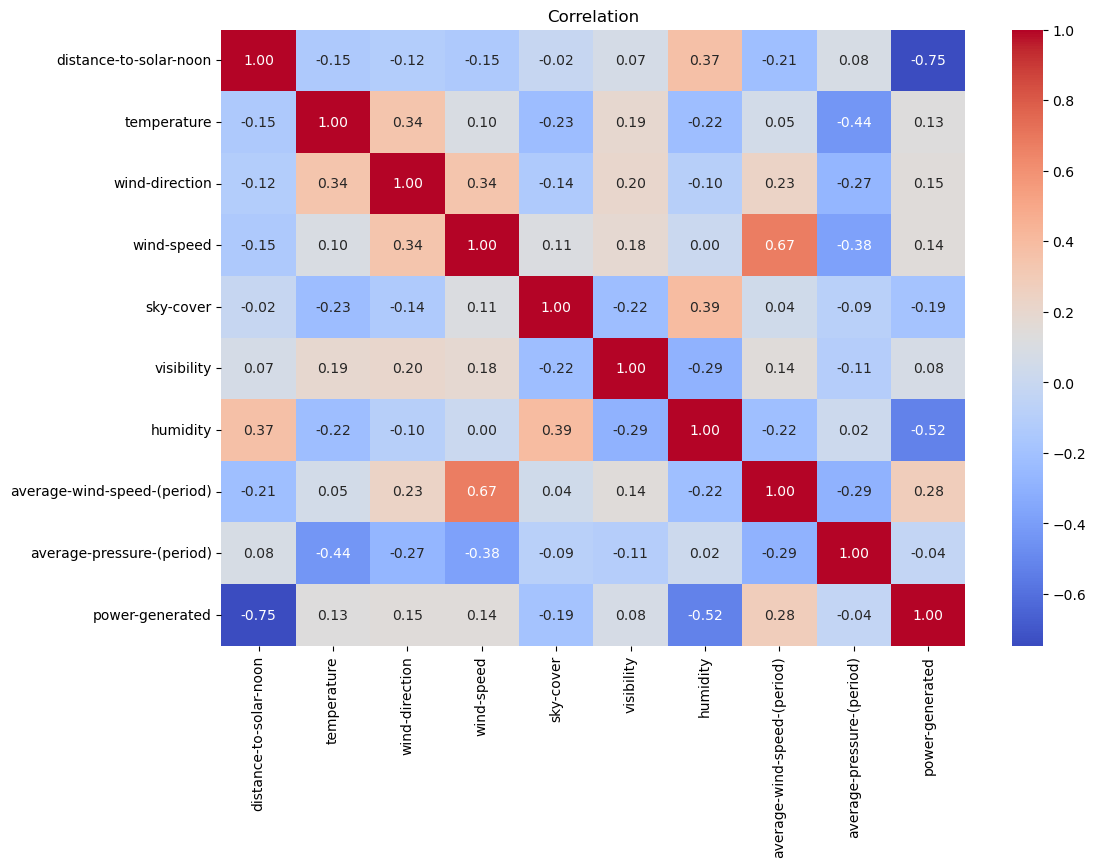

In [42]:
##Correlation
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation")
plt.show()

In [43]:
##Scatterplot
features = df.columns.drop("power-generated")

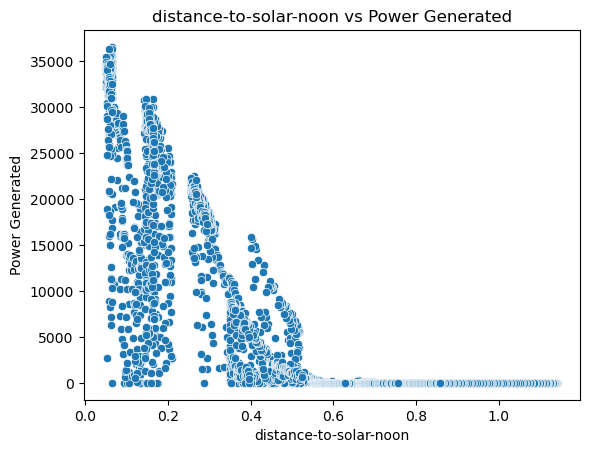

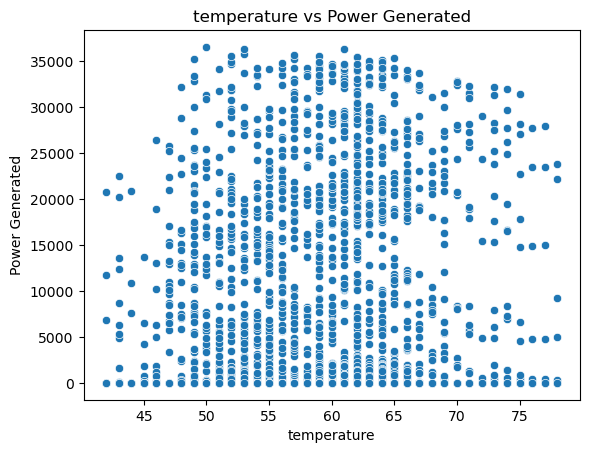

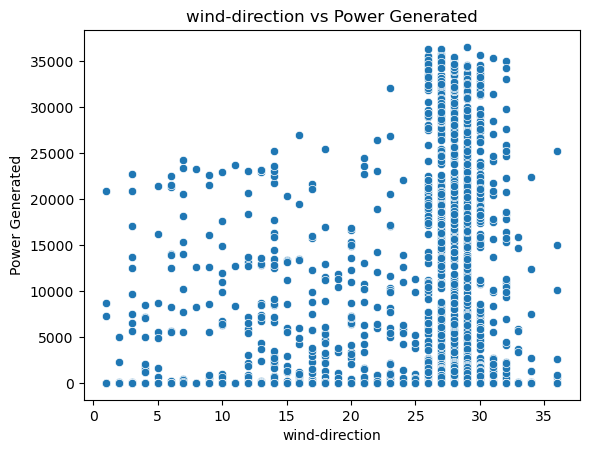

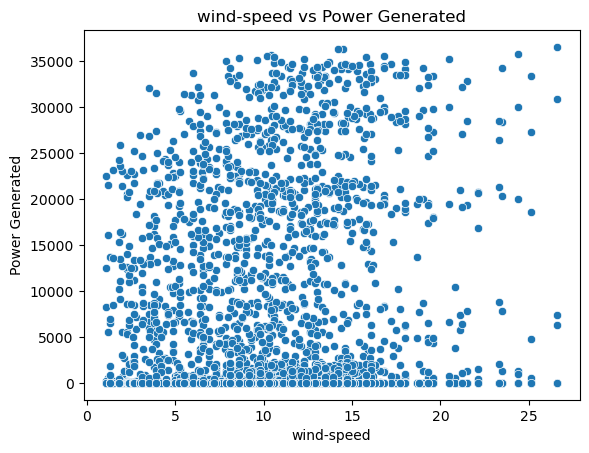

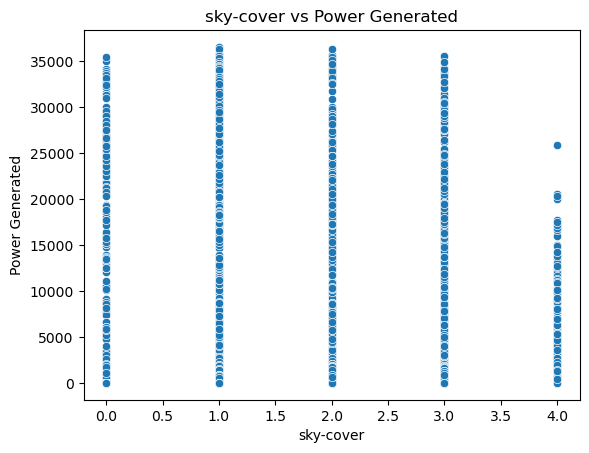

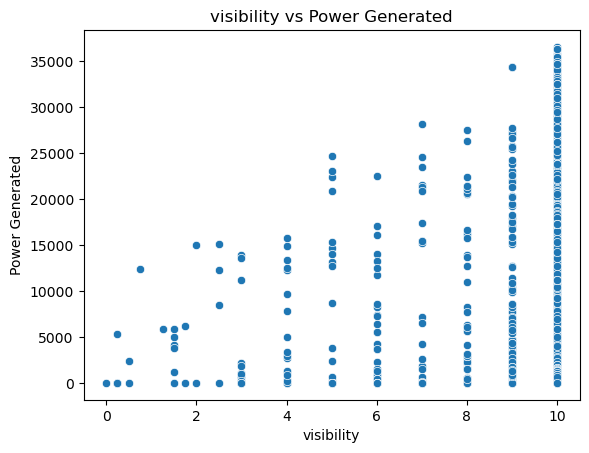

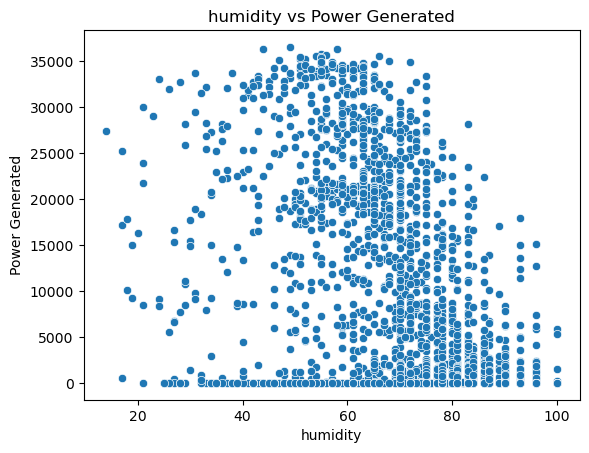

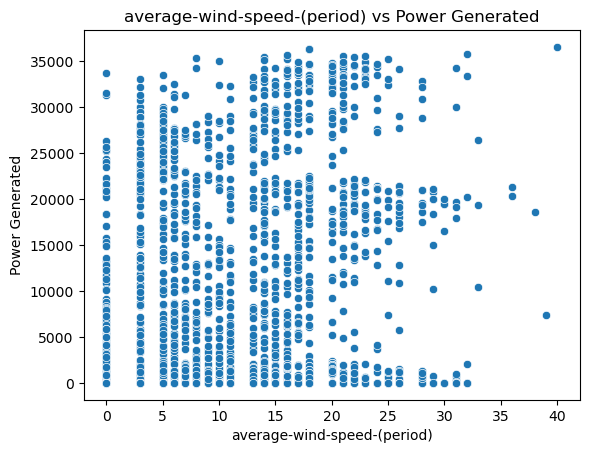

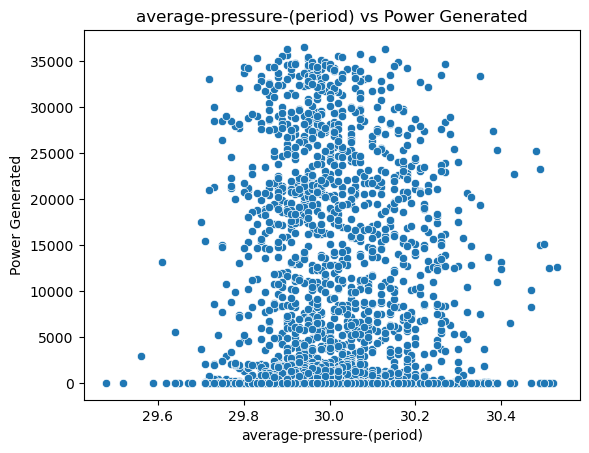

In [44]:
for feature in features:
  plt.figure()
  sns.scatterplot(x=df[feature], y=df["power-generated"])
  plt.title(f"{feature} vs Power Generated")
  plt.xlabel(feature)
  plt.ylabel("Power Generated")
  plt.show()

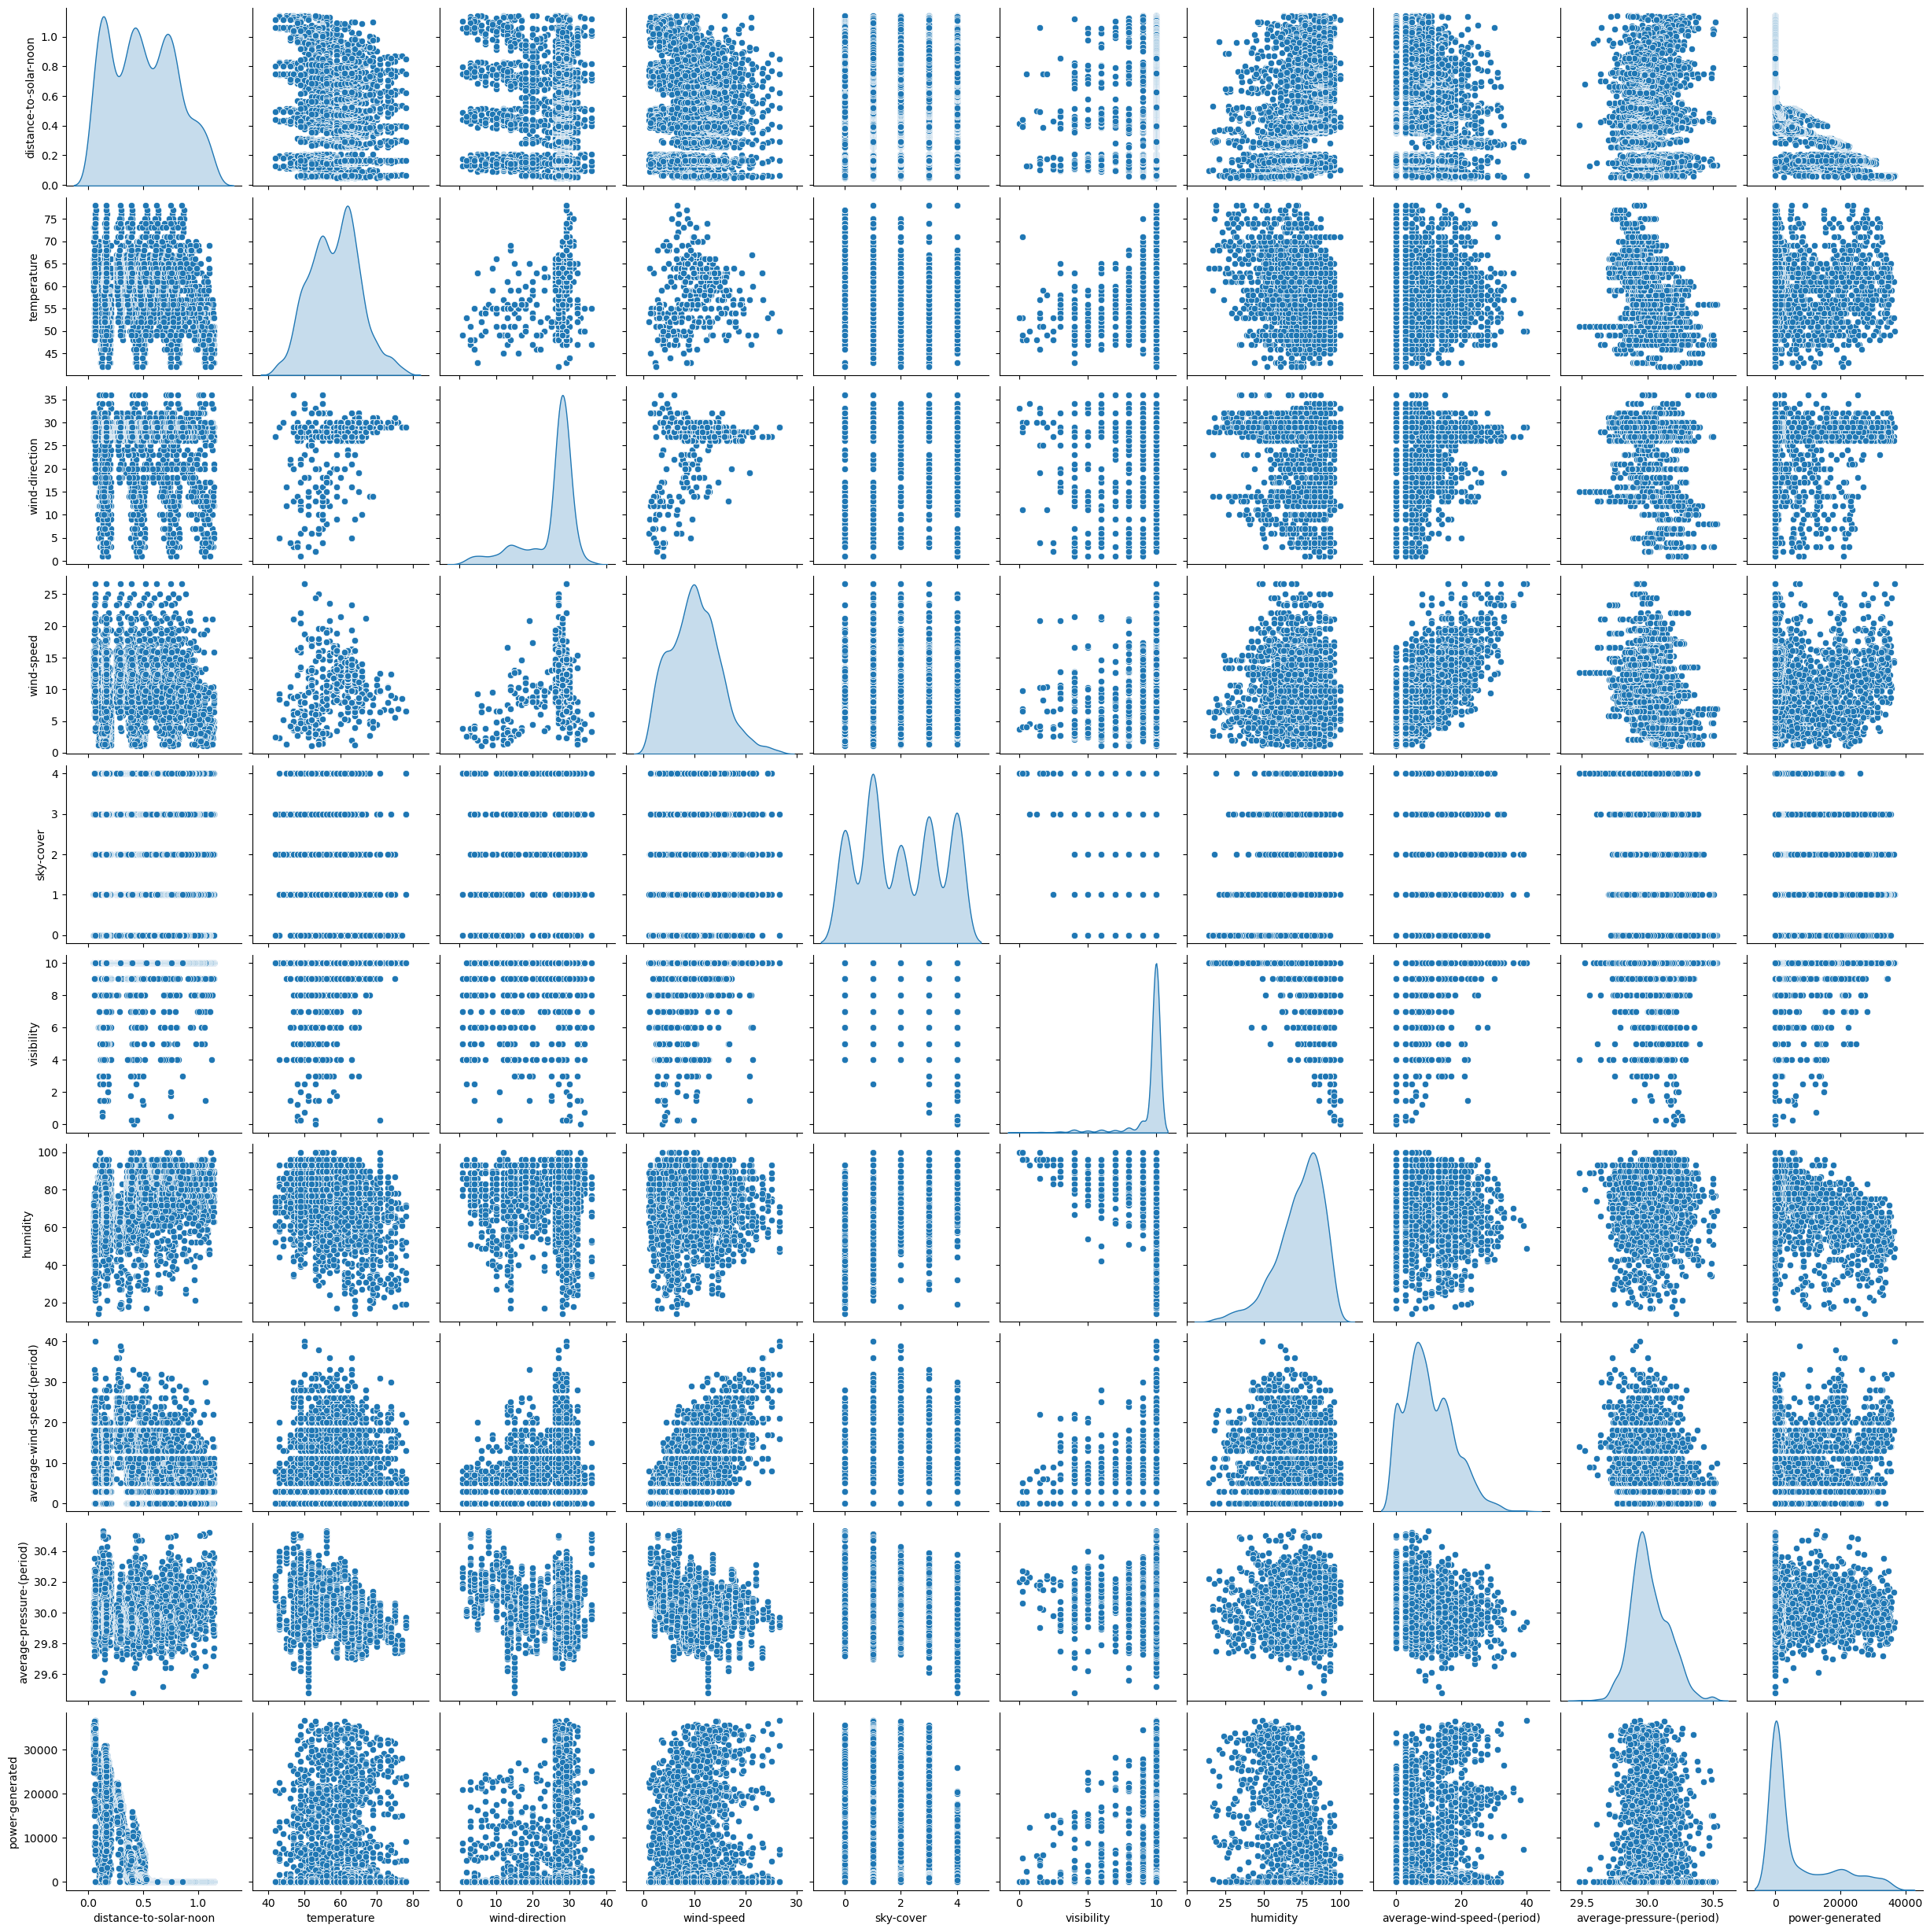

In [45]:
##Pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

In [46]:
##Feature Selection and Target Split
df = df.dropna()
x = df.drop("power-generated", axis=1)
y = df["power-generated"]

In [47]:
##Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [48]:
##Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Model Building

In [49]:
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
##Model 1 - Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 5099.810800872386
RMSE: 6440.46714070913
R2 Score: 0.6229659955805863


In [51]:
##Model 2 - Random Forest
rf = RandomForestRegressor(
    random_state = 42
)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE: 1528.4621232876711
RMSE: 3282.6175394533416
R2 Score: 0.9020540789856123


In [52]:
##Model 3 - Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
print("Gradient Boosting Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R2 Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting Performance
MAE: 1581.2485578393946
RMSE: 2947.524188300113
R2 Score: 0.9210302908386663


Actual vs Predicted Plot

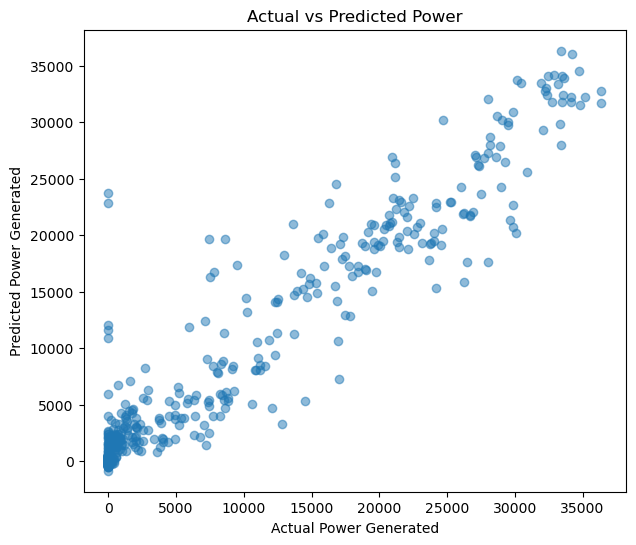

In [53]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted Power")
plt.show()

Future Power Generation Prediction

In [54]:
##Creating Future Input Data
future_data = pd.DataFrame({
    "distance-to-solar-noon": [0.5],
    "temperature": [32],
    "wind-direction": [180],
    "wind-speed": [3.2],
    "sky-cover": [1],
    "visibility": [10],
    "humidity": [45],
    "average-wind-speed": [3.0],
    "average-pressure": [29.9]
})

In [55]:
future_data = future_data.rename(columns={
    "average-wind-speed" : "average-wind-speed-(period)",
    "average-pressure" : "average-pressure-(period)"
})
future_data = future_data[x.columns]

In [56]:
##Predicting Future Power Generation
future_prediction = gbr.predict(future_data)
print("Predicted Future Power Generation:", future_prediction[0])

Predicted Future Power Generation: 6859.51372610087


In [57]:
pickle.dump(gbr, open("gbr.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))